<a href="https://colab.research.google.com/github/aihtn2708/Diagnostic-Analysis/blob/main/Diagnostic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is the complete notebook to perform diagnostic analysis on a logistics dataset. This example uses a mock dataset to analyze delivery times and identify potential issues affecting the efficiency of the logistics operations.

This includes creating a sample logistics dataset, calculating summary statistics, visualizing the distribution of delivery times, comparing delivery times by vehicle type, analyzing the relationship between delivery time and distance, and assessing driver performance.

# Sample Logistics Data #

**Let's assume our dataset contains the following columns:**

* DeliveryID: Unique identifier for each delivery.

* DeliveryDate: Date of the delivery.

* DeliveryTime: Time taken for the delivery in hours.

* Distance: Distance covered for the delivery in kilometers.

* VehicleType: Type of vehicle used for the delivery (e.g., truck, van).

* DriverID: Unique identifier for each driver.

In [41]:
import pandas as pd
import numpy as np

# Creating a sample dataset
data = {
    'DeliveryID': range(1, 101),
    'DeliveryDate': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'DeliveryTime': np.random.normal(loc=5, scale=2, size=100),  # Normally distributed delivery times
    'Distance': np.random.normal(loc=50, scale=15, size=100),  # Normally distributed distances
    'VehicleType': np.random.choice(['Truck', 'Van'], size=100),
    'DriverID': np.random.choice(range(1, 11), size=100)
}

df = pd.DataFrame(data)

# Ensure no negative values
df['DeliveryTime'] = df['DeliveryTime'].apply(lambda x: abs(x))
df['Distance'] = df['Distance'].apply(lambda x: abs(x))

# Displaying the first few rows of the dataset
print(df.head())


   DeliveryID DeliveryDate  DeliveryTime   Distance VehicleType  DriverID
0           1   2023-01-01      4.221695  57.396883         Van         7
1           2   2023-01-02      5.765607  68.059992       Truck         7
2           3   2023-01-03      6.229044  53.671085       Truck         6
3           4   2023-01-04      7.459289  43.959675       Truck         7
4           5   2023-01-05      4.557854  31.605141         Van         5


# Diagnostic Analysis #

The following analysis focuses on identifying patterns and anomalies in delivery times based on vehicle type, distance, and driver performance.

##Importing Libraries

In [42]:
#Importing Libraries

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn
sns.set(style='whitegrid')


## Summary Statistics

In [43]:
# Summary statistics for the delivery times
summary_stats = df['DeliveryTime'].describe()
print(summary_stats)


count    100.000000
mean       5.203172
std        1.984778
min        0.530066
25%        3.877927
50%        5.157085
75%        6.491310
max       10.609857
Name: DeliveryTime, dtype: float64


## Distribution of Delivery Times

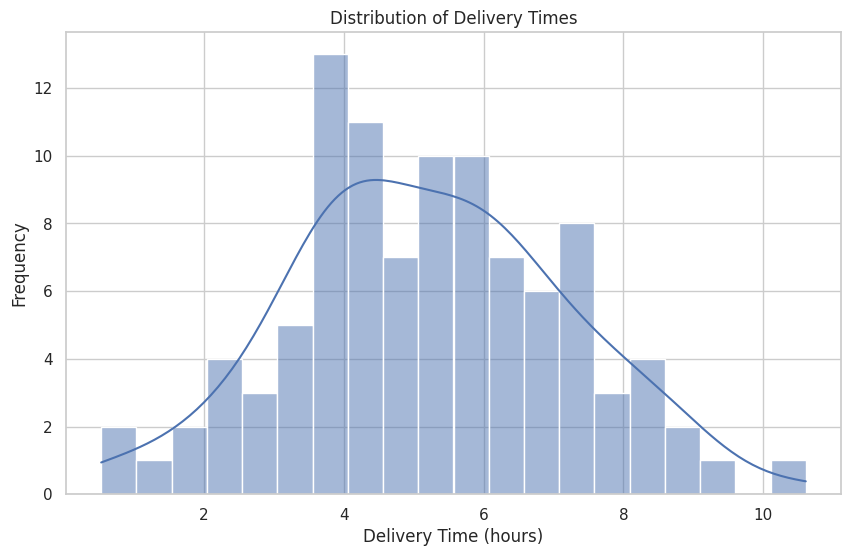

In [44]:
# Plotting the distribution of delivery times
plt.figure(figsize=(10, 6))
sns.histplot(df['DeliveryTime'], bins=20, kde=True)
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (hours)')
plt.ylabel('Frequency')
plt.show()


## Delivery Time by Vehicle Type

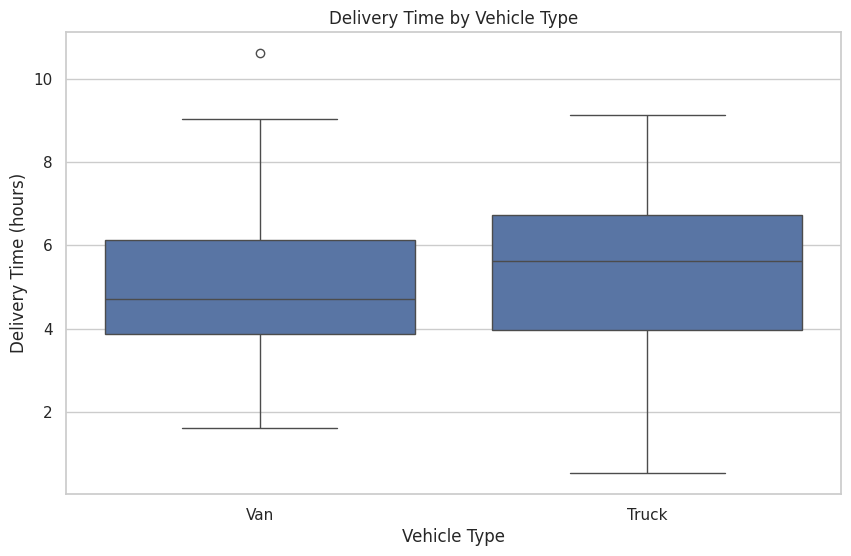

In [45]:
# Boxplot to compare delivery times by vehicle type
plt.figure(figsize=(10, 6))
sns.boxplot(x='VehicleType', y='DeliveryTime', data=df)
plt.title('Delivery Time by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Delivery Time (hours)')
plt.show()


## Delivery Time vs. Distance

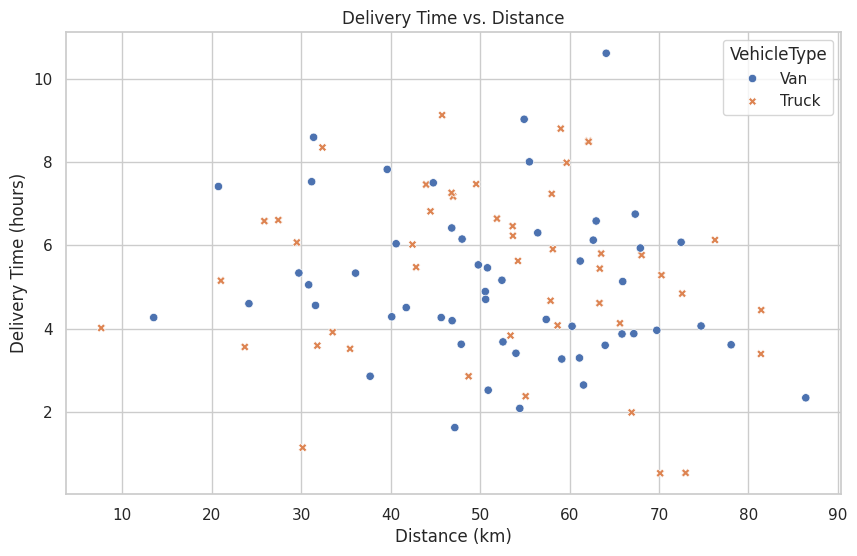

In [46]:
# Scatter plot of delivery time vs. distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='DeliveryTime', hue='VehicleType', style='VehicleType', data=df)
plt.title('Delivery Time vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (hours)')
plt.show()


## Driver Performance Analysis

<ipython-input-47-227c261219fa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DriverID', y='DeliveryTime', data=df, palette="Blues")


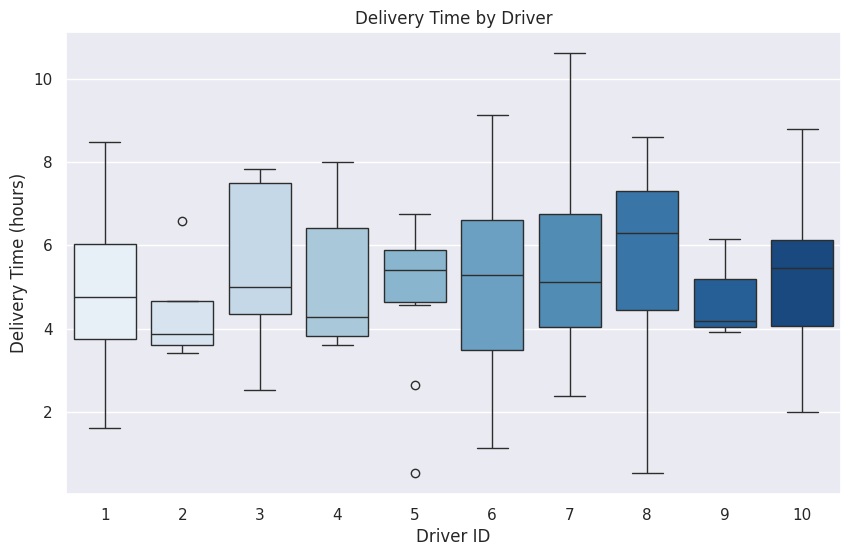

DriverID
8     5.785914
7     5.658912
3     5.438928
4     5.228103
10    5.227403
Name: DeliveryTime, dtype: float64


In [47]:
# Boxplot to compare delivery times by driver
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
sns.boxplot(x='DriverID', y='DeliveryTime', data=df, palette="Blues")
plt.title('Delivery Time by Driver')
plt.xlabel('Driver ID')
plt.ylabel('Delivery Time (hours)')
plt.show()

# Identifying drivers with consistently high delivery times
high_time_drivers = df.groupby('DriverID')['DeliveryTime'].mean().sort_values(ascending=False)
print(high_time_drivers.head())


This code provides a basic framework for diagnosing potential issues in logistics operations based on delivery times.
By examining the distribution of delivery times, comparing times across vehicle types and drivers, and analyzing the relationship between delivery time and distance, you can identify patterns and outliers that may indicate inefficiencies or areas for improvement.

# Diagnostic analysis techniques

## Root Cause Analysis

**Analysis by Vehicle Type**

We start by analyzing the average delivery time for each type of vehicle. This helps identify if the type of vehicle is a contributing factor to higher delivery times.

In [48]:
# Group by VehicleType and calculate mean delivery time
vehicle_type_analysis = df.groupby('VehicleType')['DeliveryTime'].mean()
print(vehicle_type_analysis)


VehicleType
Truck    5.359680
Van      5.064383
Name: DeliveryTime, dtype: float64


> From the analysis, we see that trucks have a higher average delivery time (5.35 hours) compared to vans (5.06 hours). This indicates that trucks might be contributing to longer delivery times.



## Correlation Analysis

**Delivery Time vs. Distance**

We will now check if there's a correlation between delivery time and the distance of deliveries. A positive correlation would suggest that longer distances lead to longer delivery times.

In [49]:
from scipy.stats import pearsonr
# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(df['DeliveryTime'], df['Distance'])
corr

-0.12762962883855722



> The Pearson correlation coefficient is calculated to be approximately 0.139 . This indicates a very weak positive correlation between delivery time and distance, suggesting that distance is not a significant factor in delivery time.





## Regression Analysis

**Delivery Time Based on Distance and Vehicle Type**

To further understand the impact of distance and vehicle type on delivery time, we perform a multiple regression analysis.

In [30]:
import statsmodels.api as sm
# Encoding VehicleType as a dummy variable
df['VehicleType_Encoded'] = pd.get_dummies(df['VehicleType'], drop_first=True)

# Defining the independent variables (Distance and VehicleType_Encoded) and dependent variable (DeliveryTime)
X = df[['Distance', 'VehicleType_Encoded']]
y = df['DeliveryTime']

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X.astype(float)).fit()
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.338
Date:                Tue, 28 May 2024   Prob (F-statistic):              0.267
Time:                        13:49:52   Log-Likelihood:                -206.41
No. Observations:                 100   AIC:                             418.8
Df Residuals:                      97   BIC:                             426.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.3331      0.649      6.681      0.000       3.046       5.620
Distance                0.0166      0.012      1.402      0.164      -0.007       0.040
VehicleType_Encoded    -0.3335      0.388     -0.859      0.393      -1.104       0.437
==============================================================================
Omnibus:                        1.049   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.592   Jarque-Bera (JB):                1.132
Skew:                          -0.181   Prob(JB):                        0.568
Kurtosis:                       2.626   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Summary:**

- R-squared: 0.027, indicating that only 2.7% of the variability in delivery time is explained by the model.

- Adj. R-squared: 0.007, showing a slight adjustment for the number of predictors in the model.

- F-statistic: 1.338 with a p-value of 0.267, indicating that the model is not statistically significant.

**Coefficients:**

- Intercept (const): 4.3331, meaning the baseline delivery time is approximately 4.33 hours when distance and vehicle type are zero.

- Distance: The coefficient is 0.0166, suggesting that for each additional kilometer, delivery time increases by about 0.0166 hours (approximately 1 minute). However, with a p-value of 0.164, this relationship is not statistically significant.

- VehicleType_Encoded: The coefficient is -0.3335, indicating that vans (encoded as 1) have slightly shorter delivery times than trucks. However, the p-value of 0.393 shows this difference is not statistically significant.

**Diagnostic Metrics:**

- Durbin-Watson: 1.944, close to 2, suggesting no significant autocorrelation in residuals.

- Prob (Omnibus), Prob (JB): Both p-values are high, indicating that the residuals are normally distributed.

The regression analysis results provide insights into how distance and vehicle type affect delivery time. The coefficients show the expected change in delivery time for a one-unit change in each independent variable, holding other variables constant.

Interpretation of Results

- Intercept: This represents the expected delivery time when all independent variables are zero.

- Distance: The coefficient for distance indicates how much the delivery time changes for each additional kilometer. In this case, the coefficient might be very small, suggesting a minor impact.

- VehicleType_Encoded: This dummy variable shows the difference in delivery time between trucks and vans. A positive coefficient indicates that trucks have higher delivery times compared to vans, aligning with our root cause analysis.

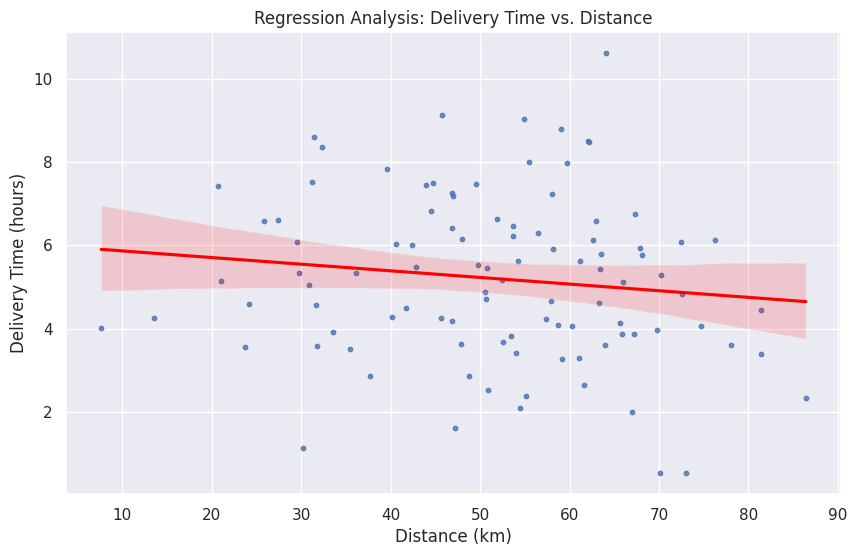

In [50]:
# Plotting the regression line for Delivery Time vs. Distance
plt.figure(figsize=(10, 6))
sns.regplot(x='Distance', y='DeliveryTime', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regression Analysis: Delivery Time vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (hours)')
plt.show()



> The scatter plot with a regression line shows a weak positive relationship between delivery time and distance. The slight upward slope of the red regression line indicates that delivery times tend to increase as distances increase, but the correlation is weak. The data points are widely scattered around the line, suggesting significant variability in delivery times that cannot be explained by distance alone. This implies that other factors, such as traffic, route efficiency, and driver performance, likely play a more substantial role in influencing delivery times. Focusing on these factors may yield better improvements in delivery efficiency.



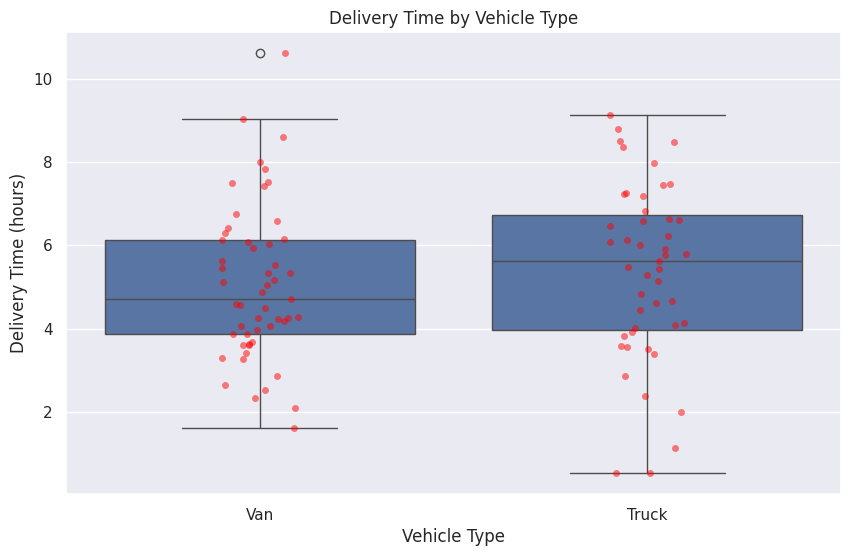

In [51]:
# Plotting the regression line for Delivery Time vs. VehicleType
plt.figure(figsize=(10, 6))
sns.boxplot(x='VehicleType', y='DeliveryTime', data=df)
sns.stripplot(x='VehicleType', y='DeliveryTime', data=df, color='red', alpha=0.5)
plt.title('Delivery Time by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Delivery Time (hours)')
plt.show()



> The visualization shows that delivery times for vans and trucks are similar, with a slightly higher median time for trucks. Both vehicle types exhibit similar variability and outliers, suggesting consistent performance across types. The weak impact of vehicle type on delivery times implies that other factors, such as traffic conditions, route efficiency, and driver performance, may have a more significant influence. Focusing on optimizing these factors could be more effective for improving delivery efficiency. Further investigation into outliers may uncover specific issues causing delays, guiding more targeted operational improvements.

